In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
win = pd.read_csv("wine.csv")
win.describe()
win.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Considering only numerical data 
win.data = win.iloc[:,1:]
win.data.head()
# Converting into numpy array
arr = win.data.values
arr

<ipython-input-3-8aad55c866dd>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  win.data = win.iloc[:,1:]


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
arr = arr.astype('int64')
arr

array([[  14,    1,    2, ...,    1,    3, 1065],
       [  13,    1,    2, ...,    1,    3, 1050],
       [  13,    2,    2, ...,    1,    3, 1185],
       ...,
       [  13,    4,    2, ...,    0,    1,  835],
       [  13,    2,    2, ...,    0,    1,  840],
       [  14,    4,    2, ...,    0,    1,  560]], dtype=int64)

In [5]:
# Normalizing the numerical data 
win_normal = scale(win)

In [6]:
win_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(win_normal)
pca_values 

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
        -4.20493905e-01,  5.52927766e-01, -3.02978176e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
        -1.30019629e-01,  3.94971160e-01, -1.46645308e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
        -2.79074108e-01,  1.89799314e-03,  2.12780166e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         5.02640272e-01,  6.93336340e-01,  1.67035660e-01],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.13785741e-01,  3.44119826e-01, -1.09514873e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -2.38282390e-01, -1.89866131e-01, -1.64090011e-01]])

In [8]:
#loadings or weights
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [9]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458])

In [10]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85, 97.46, 98.67, 99.6 ])

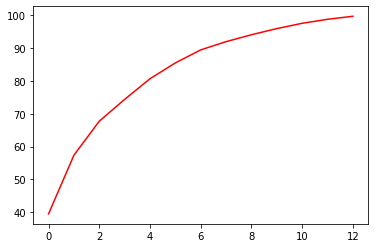

In [11]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [12]:
 pca_values[:,0:1]

array([[-3.5229339 ],
       [-2.52885806],
       [-2.78502898],
       [-3.92258841],
       [-1.40751111],
       [-3.28812981],
       [-2.75057754],
       [-2.39286652],
       [-2.79525633],
       [-3.00559666],
       [-3.67868855],
       [-2.10963477],
       [-2.43845636],
       [-3.67349453],
       [-4.44157575],
       [-2.60892387],
       [-2.47542846],
       [-2.22623243],
       [-3.74226929],
       [-2.3944115 ],
       [-3.33656895],
       [-1.48140399],
       [-2.82806867],
       [-2.00771405],
       [-2.11463604],
       [-1.39753751],
       [-2.13348803],
       [-1.62970383],
       [-2.50760753],
       [-2.55948318],
       [-2.77244452],
       [-2.93513374],
       [-1.99124842],
       [-2.24570987],
       [-1.78698628],
       [-2.22763867],
       [-1.76802847],
       [-1.52317798],
       [-1.87236494],
       [-2.79711434],
       [-2.84093569],
       [-1.1055721 ],
       [-3.30689482],
       [-0.90479842],
       [-2.39683569],
       [-1

In [42]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), win[['Alcohol']]], axis = 1)
finalDf

,pc1,pc2,pc3,Alcohol
0,-3.522934,-1.453098,-0.164795,14.23
1,-2.528858,0.330019,-2.026707,13.20
2,-2.785029,-1.036936,0.983238,13.16
3,-3.922588,-2.768210,-0.174968,14.37
4,-1.407511,-0.867773,2.025829,13.24
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,13.71
174,2.942729,-1.752263,0.207480,13.40
175,3.027272,-2.756040,-0.940803,13.27
176,2.755222,-2.293784,-0.550474,13.17


In [18]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

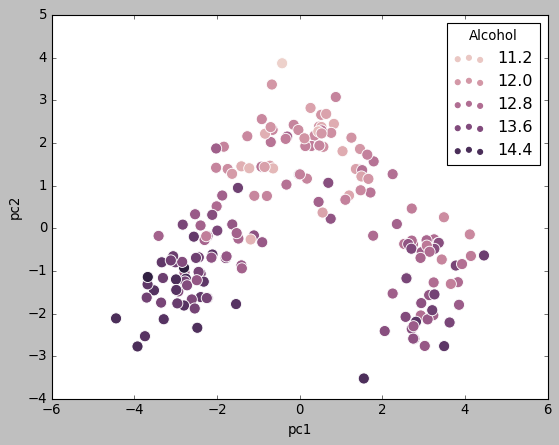

In [43]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Alcohol',s = 100) 

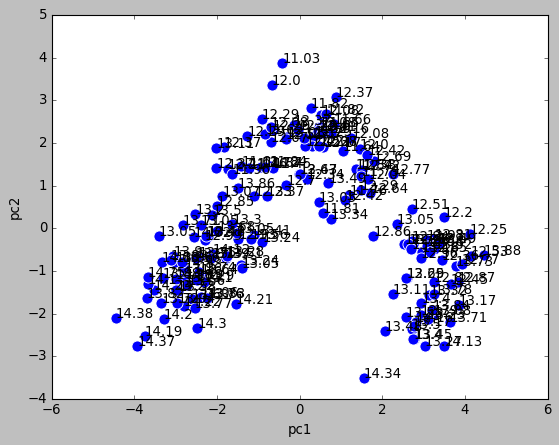

In [44]:
p1 = sns.scatterplot(data=finalDf,x='pc1',y='pc2',s = 100)  
for line in range(0,finalDf.shape[0]):
     p1.text(finalDf.pc1[line], finalDf.pc2[line], finalDf.Alcohol[line], horizontalalignment='left', size='medium')

In [48]:
## Hclustering

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
Df = pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])
Df

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


In [54]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [57]:
df_norm = norm_func(Df.iloc[:,0:])
df_norm

,pc1,pc2,pc3
0,0.103200,0.279639,0.445096
1,0.214875,0.520989,0.257637
2,0.186097,0.335968,0.560682
3,0.058303,0.101634,0.444072
4,0.340848,0.358864,0.665651
...,...,...,...
173,0.906538,0.177648,0.427087
174,0.829555,0.239146,0.482577
175,0.839053,0.103282,0.366967
176,0.808490,0.165849,0.406266


In [58]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(Df.iloc[:,0:]))
data 

,0,1,2
0,0.103200,0.279639,0.445096
1,0.214875,0.520989,0.257637
2,0.186097,0.335968,0.560682
3,0.058303,0.101634,0.444072
4,0.340848,0.358864,0.665651
...,...,...,...
173,0.906538,0.177648,0.427087
174,0.829555,0.239146,0.482577
175,0.839053,0.103282,0.366967
176,0.808490,0.165849,0.406266


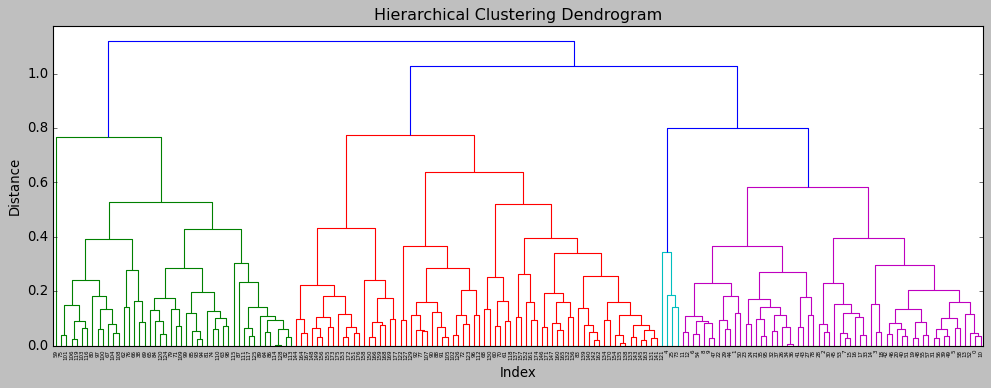

In [59]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [60]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Df['clust']=cluster_labels # creating a  new column and assigning it to new column 
Df

,pc1,pc2,pc3,clust
0,-3.522934,-1.453098,-0.164795,2
1,-2.528858,0.330019,-2.026707,2
2,-2.785029,-1.036936,0.983238,2
3,-3.922588,-2.768210,-0.174968,2
4,-1.407511,-0.867773,2.025829,3
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,4
174,2.942729,-1.752263,0.207480,1
175,3.027272,-2.756040,-0.940803,4
176,2.755222,-2.293784,-0.550474,4


In [61]:
Df.iloc[:,0:].groupby(Df.clust).mean()

,pc1,pc2,pc3,clust
clust,,,,
0,-0.383413,2.011353,-0.026841,0
1,2.324004,0.175003,0.088682,1
2,-2.602829,-0.960952,-0.245234,2
3,-1.572218,-0.585326,3.642297,3
4,2.934486,-2.159795,-0.177252,4


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Df_subset = pd.DataFrame(scaler.fit_transform(Df.iloc[:,0:]))
Df_subset 

,0,1,2,3
0,-1.497299,-0.919558,-0.137041,0.452040
1,-1.074802,0.208845,-1.685371,0.452040
2,-1.183678,-0.656200,0.817642,0.452040
3,-1.667158,-1.751795,-0.145500,0.452040
4,-0.598213,-0.549149,1.684642,1.273093
...,...,...,...,...
173,1.541952,-1.396404,-0.285788,2.094146
174,1.250703,-1.108877,0.172536,-0.369012
175,1.286635,-1.744093,-0.782354,2.094146
176,1.171010,-1.451565,-0.457764,2.094146


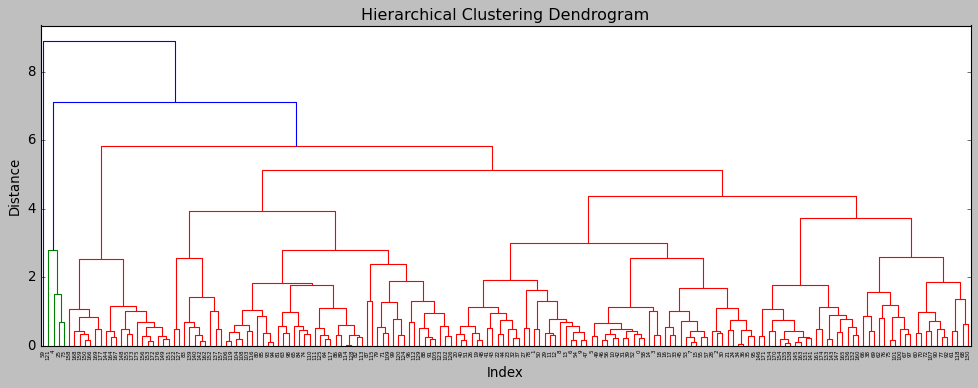

In [64]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(Df_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [65]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(Df_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
Df['clust']=cluster_labels # creating a  new column and assigning it to new column 
Df 

,pc1,pc2,pc3,clust
0,-3.522934,-1.453098,-0.164795,0
1,-2.528858,0.330019,-2.026707,0
2,-2.785029,-1.036936,0.983238,0
3,-3.922588,-2.768210,-0.174968,0
4,-1.407511,-0.867773,2.025829,2
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,4
174,2.942729,-1.752263,0.207480,0
175,3.027272,-2.756040,-0.940803,4
176,2.755222,-2.293784,-0.550474,4


In [66]:
## Kmeans Clustering

In [67]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np

In [68]:
Df = pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])
Df

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


In [69]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [71]:
df_norm = norm_func(Df.iloc[:,0:])

In [72]:
df_norm.head(10)  # Top 10 rows

,pc1,pc2,pc3
0,0.103200,0.279639,0.445096
1,0.214875,0.520989,0.257637
2,0.186097,0.335968,0.560682
3,0.058303,0.101634,0.444072
4,0.340848,0.358864,0.665651
5,0.129578,0.187994,0.398360
6,0.189967,0.316716,0.363289
7,0.230153,0.258228,0.476360
8,0.184948,0.351365,0.283389
9,0.161318,0.368540,0.362644


C:\Users\anbuc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


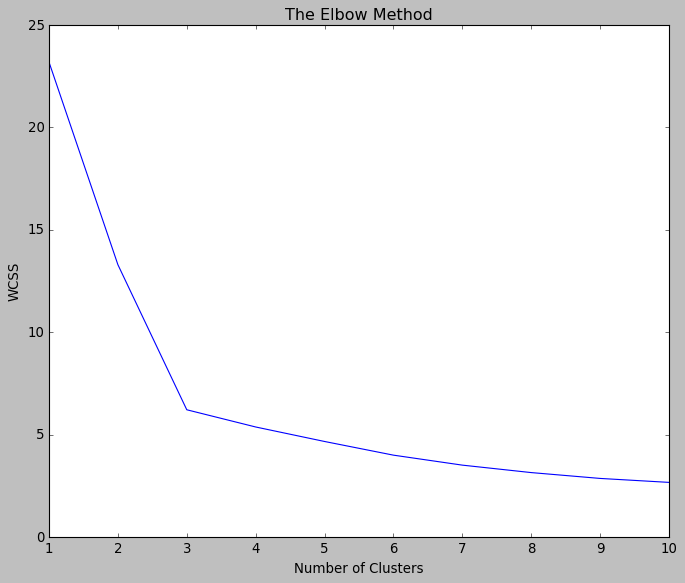

In [73]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [74]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(df_norm)

In [75]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 3, 3, 0, 0,
       3, 3, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 3, 3, 0, 2, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 1, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [76]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
Df['clust']=md # creating a  new column and assigning it to new column 
Df

,pc1,pc2,pc3,clust
0,-3.522934,-1.453098,-0.164795,1
1,-2.528858,0.330019,-2.026707,1
2,-2.785029,-1.036936,0.983238,1
3,-3.922588,-2.768210,-0.174968,1
4,-1.407511,-0.867773,2.025829,1
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,2
174,2.942729,-1.752263,0.207480,2
175,3.027272,-2.756040,-0.940803,2
176,2.755222,-2.293784,-0.550474,2


In [79]:
 Df.iloc[:,0:3].groupby(Df.clust).mean()

,pc1,pc2,pc3
clust,,,
0,0.560348,1.417125,0.877171
1,-2.582875,-0.976303,-0.063645
2,3.058665,-1.208263,-0.177541
3,-0.597103,2.106830,-0.778228


Text(0.5, 1.0, 'Clusters using KMeans')

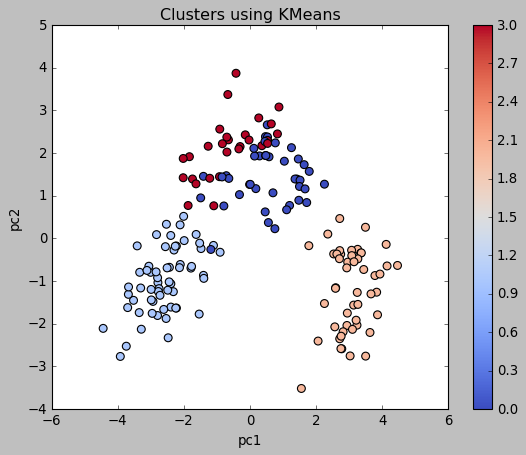

In [80]:
Df.plot(x="pc1",y ="pc2",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [83]:
clf.inertia_

5.365985251567785

In [84]:
WCSS

[23.188329506957263,
 13.297193198131819,
 6.212498281504526,
 5.371915031692483,
 4.664173741075215,
 3.9964831501657994,
 3.5090960586204574,
 3.1453615741135694,
 2.8601401449942228,
 2.666778727820316]